# Closed-Loop Controllers
### author: Juan M. Acevedo-Valle
### date: 10/Apr/2018

In [2]:
%matplotlib inline
import pylab as plt
from control import tf
import control
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams['figure.figsize'] = (11.0, 6.)


     1
-----------
s^2 + s + 1



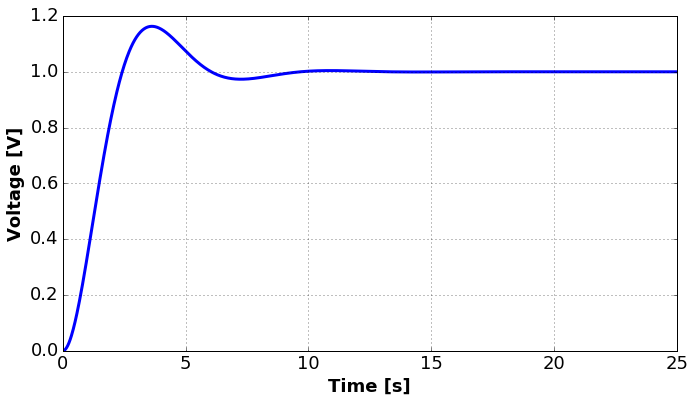

In [5]:
#Open loop LCR system
L = 1
C = 1
R = 1
num = [0, 1]
den = [L,R,1/C]
tf_lcr = tf(num,den)
print(tf_lcr)

#Step response to step with tf
T = np.linspace(0,25,1000)
T, y_step = control.step_response(tf_lcr,T)
plt.plot(T,y_step,lw = 3)
plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel("Voltage [V]", weight = 'bold')
plt.grid(True)

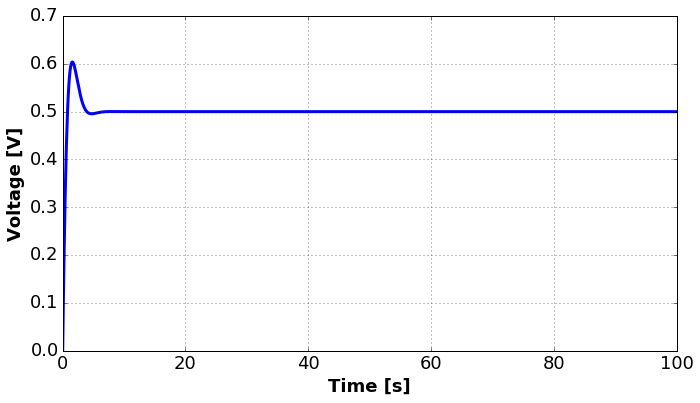

In [14]:
# Proportional-derivative controller.... Why!!!!!!!!!
num = [0, 1]
den = [L,R,1/C]
P_s = tf(num,den)
# print(tf_lcr)

#Step response to step with tf
T = np.linspace(0,100,1000)
K_s = tf([1,1],[1])
G_s = control.series(K_s,P_s)
Gcl_s = control.feedback(G_s,1)
# print(Gcl_s)

T, y_step = control.step_response(Gcl_s,T)
plt.plot(T,y_step,lw = 3)
plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel("Voltage [V]", weight = 'bold')
plt.grid(True)


     1
-----------
s^2 + s + 1



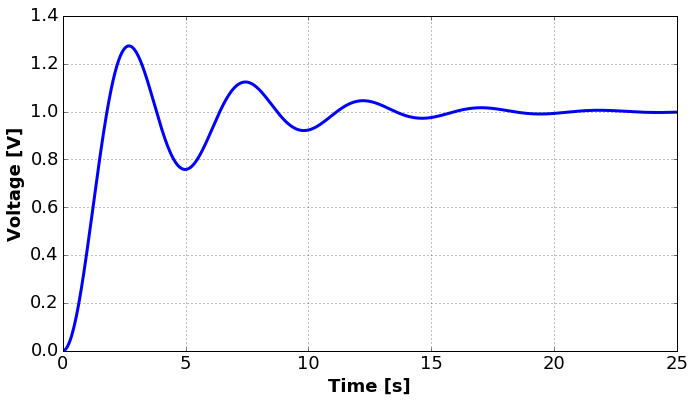

In [23]:
# Integral Proportional-derivative controller.... Why!!!!!!!!! Tom compensate ss error
num = [0, 1]
den = [L,R,1/C]
tf_lcr = tf(num,den)
print(tf_lcr)

#Step response to step with tf
T = np.linspace(0,25,1000)
K_s = tf([0,1,1],[1,0])

T, y_step = control.step_response(control.feedback(control.series(K_s,tf_lcr),1),T)
plt.plot(T,y_step,lw = 3)
plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel("Voltage [V]", weight = 'bold')
plt.grid(True)


       1
---------------
s^2 + 0.5 s + 1



(-3, 3)

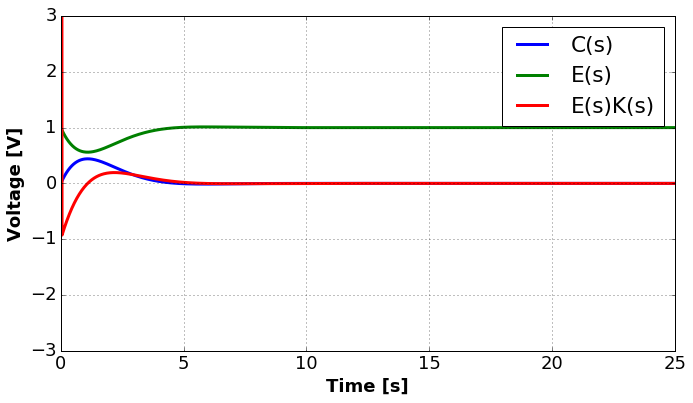

In [26]:
# Derivative controller analysis
L=1
R=0.5
C = 1
num = [0, 1]
den = [L,R,1/C]
tf_lcr = tf(num,den)
print(tf_lcr)

#Step response to step with tf
T = np.linspace(0,25,1000)
K_s = tf([1,0],[1])

T, y_step = control.step_response(control.feedback(control.series(K_s,tf_lcr),1),T)
plt.plot(T,y_step,lw = 3)
E_s = np.array([0.]+[1.]*999)-y_step
plt.plot(T,E_s,lw=3)
plt.plot(T,np.gradient(E_s,T),lw=3)

plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel("Voltage [V]", weight = 'bold')
plt.grid(True)
plt.legend(['C(s)',"E(s)","E(s)K(s)"])
plt.ylim([-3,3])


       1
---------------
s^2 + 0.5 s + 1



(-0.5, 5)

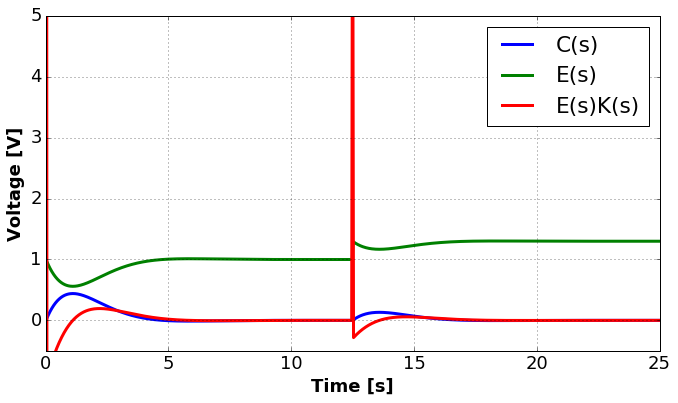

In [27]:
# Derivative controller analysis
num = [0, 1]
den = [L,R,1/C]
tf_lcr = tf(num,den)
print(tf_lcr)

v_ref = np.array([0.0]+[1.]*499+[1.3]*500)
#Step response to step with tf
T = np.linspace(0,25,1000)
K_s = tf([1,0],[1])

T, y_step,foo = control.forced_response(control.feedback(control.series(K_s,tf_lcr),1),T,v_ref)
plt.plot(T,y_step,lw = 3)
E_s = v_ref-y_step
plt.plot(T,E_s,lw=3)
plt.plot(T,np.gradient(E_s,T),lw=3)

plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel("Voltage [V]", weight = 'bold')
plt.grid(True)
plt.legend(['C(s)',"E(s)","E(s)K(s)"])
plt.ylim([-0.5,5])


       1
---------------
s^2 + 0.5 s + 1



(-0.5, 5)

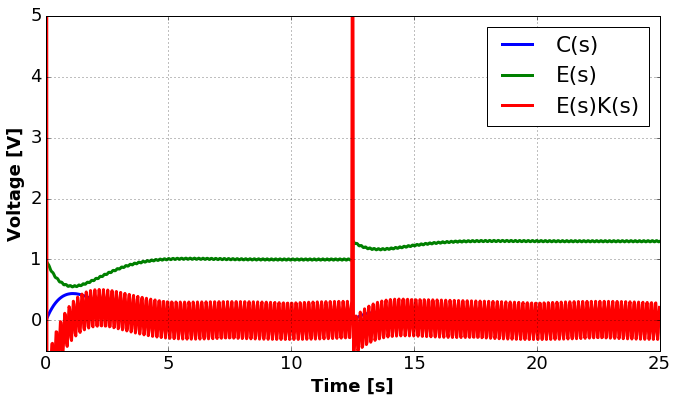

In [28]:
# Derivative controller analysis
num = [0, 1]
den = [L,R,1/C]
tf_lcr = tf(num,den)
print(tf_lcr)

v_ref = np.array([0.0]+[1.]*499+[1.3]*500) + 0.01*np.sin(1e6 *np.linspace(0,25,1000))
#Step response to step with tf
T = np.linspace(0,25,1000)
K_s = tf([1,0.],[1])

T, y_step,foo = control.forced_response(control.feedback(control.series(K_s,tf_lcr),1),T,v_ref)
plt.plot(T,y_step,lw = 3)
E_s = v_ref-y_step
plt.plot(T,E_s,lw=3)
plt.plot(T,np.gradient(E_s,T),lw=3)

plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel("Voltage [V]", weight = 'bold')
plt.grid(True)
plt.legend(['C(s)',"E(s)","E(s)K(s)"])
plt.ylim([-0.5,5])

In [ ]:
#Unstable System
P_s = control.tf([1],[1,-3,1])
T = np.linspace(0,50,1000)

T, y_step = control.step_response(P_s,T)
plt.plot(T,y_step,lw = 3)

plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel("Out [units]", weight = 'bold')
plt.grid(True)
# plt.ylim([-0.5,5])

In [ ]:
#Stabilization control (PID)
P_s = control.tf([1],[1,-3,1.1])
Kp = 10
Ti = 0.1
Td = 31
K_s = control.tf([Kp*Td*Ti, Kp*Ti, 1],[Ti, 0])
G_s = control.series(K_s,P_s)
Gcl_s = control.feedback(G_s,1)

T = np.linspace(0,50,1000)

T, y_step = control.step_response(Gcl_s,T)
plt.plot(T,y_step,lw = 3)

plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel("Out [units]", weight = 'bold')
plt.grid(True)
# plt.ylim([-0.5,5])